<a href="https://colab.research.google.com/github/yeahginny/Machine_learning/blob/main/KNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.7 MB/s eta 0:00:00


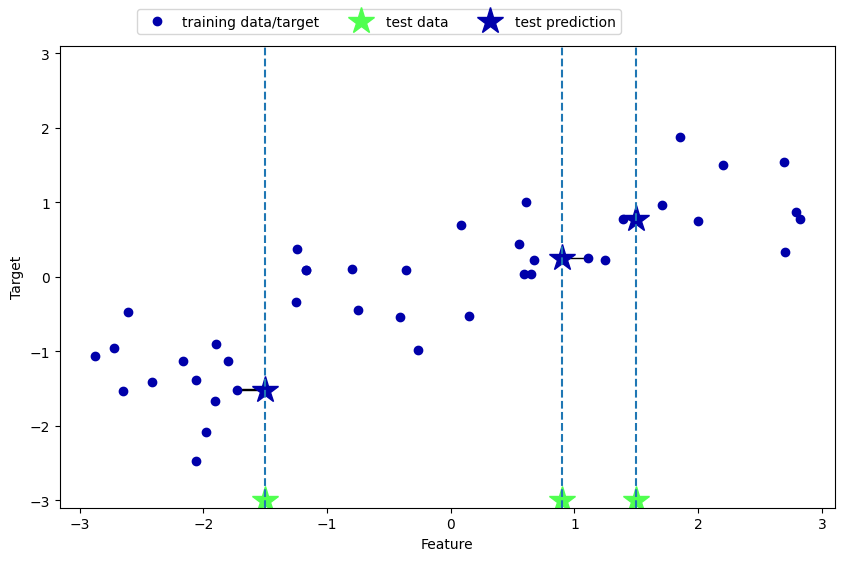

In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

mglearn.plots.plot_knn_regression()

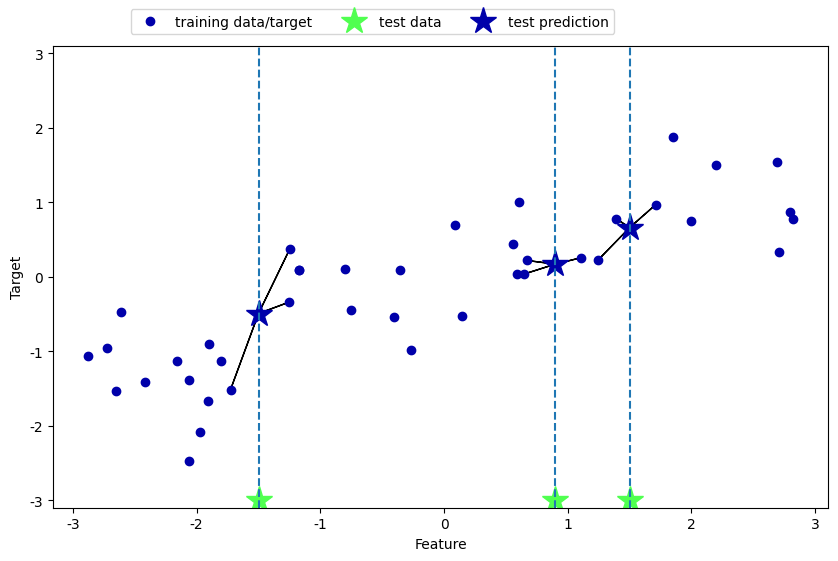

In [ ]:

mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:

X, y = make_classification(n_samples=30, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, n_classes=2, random_state=1)

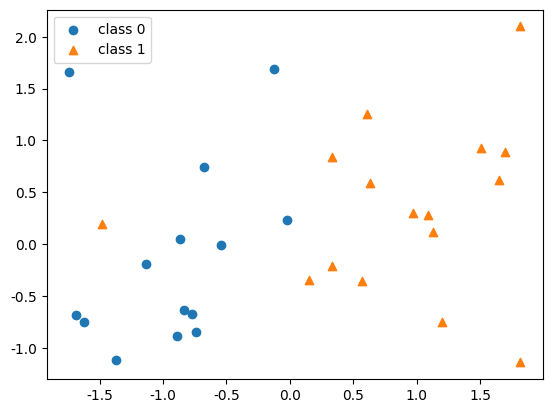

In [ ]:


mlp.rcParams['axes.unicode_minus'] = False # 축에 음수 표시
fig, ax = plt.subplots()
ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', label='class 0');
ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='^', label='class 1');
ax.legend(loc='best')

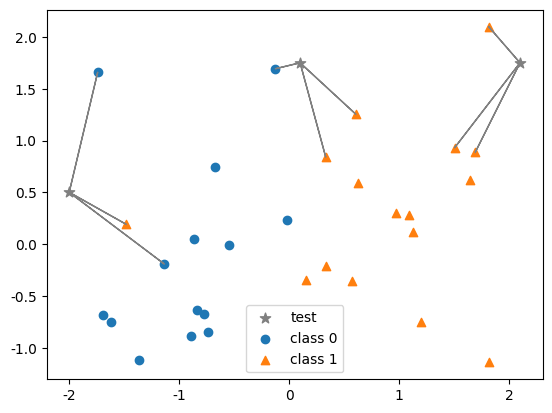

In [ ]:
n_neighbors=3
X_test = np.array([[0.1, 1.75], [-2.0, 0.5], [2.1, 1.75]])


dist = euclidean_distances(X, X_test)
closest = np.argsort(dist, axis=0)

fig, ax = plt.subplots()
ax.scatter(X_test[:, 0], X_test[:, 1], c='gray', marker='*', s=60, label='test')
ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', label='class 0');
ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='^', label='class 1');

for x, neighbors in zip(X_test, closest.T):
  for neighbor in neighbors[:n_neighbors]:
    ax.arrow(x[0], x[1], X[neighbor, 0] - x[0], X[neighbor, 1] - x[1], head_width=0, fc='gray', ec='gray')
    ax.legend(loc='best')


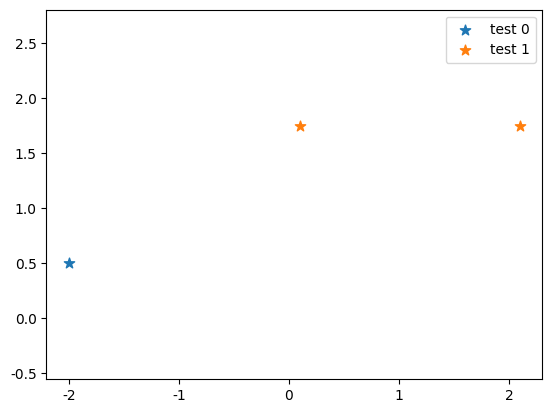

In [ ]:

knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
y_pred = knn.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], c='C0', marker='*', s=60, label='test 0');
ax.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='C1', marker='*', s=60, label='test 1');

ax.axis('equal');
handles, labels = ax.get_legend_handles_labels();
ax.legend(handles=handles, loc='best');


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


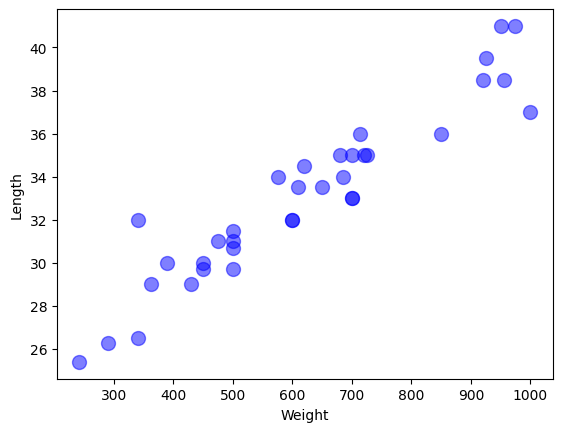

In [7]:
# 데이터프레임에서 원하는 데이터 뽑아내기
bream_data = fish[fish['Species'] =='Bream']
plt.plot('Weight',  # x
         'Length',  # y
         data=bream_data,
         linestyle='none',
         marker='o',
         markersize=10,
         color='blue',
         alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

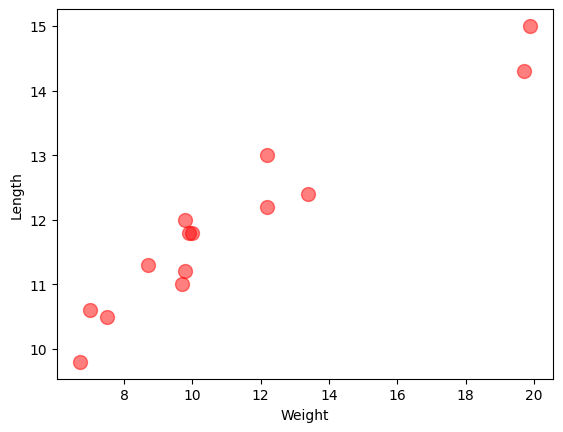

In [8]:
# 데이터프레임에서 원하는 데이터 뽑아내기
bream_data = fish[fish['Species'] =='Smelt']

plt.plot('Weight',  # x
         'Length',  # y
         data=bream_data,
         linestyle='none',
         marker='o',
         markersize=10,
         color='red',
         alpha=0.5)

plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [9]:
fish.groupby('Species').count()

# 7종의 물고기가 있습니다

,Weight,Length,Diagonal,Height,Width
Species,,,,,
Bream,35,35,35,35,35
Parkki,11,11,11,11,11
Perch,56,56,56,56,56
Pike,17,17,17,17,17
Roach,20,20,20,20,20
Smelt,14,14,14,14,14
Whitefish,6,6,6,6,6


In [10]:
# 방어와 도미 데이터만 뽑아내기
breamSmelt = fish[(fish['Species'] =='Bream')|(fish['Species']=='Smelt')]
print(breamSmelt)

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
5     Bream   450.0    29.7      34.7  13.6024  4.9274
6     Bream   500.0    29.7      34.5  14.1795  5.2785
7     Bream   390.0    30.0      35.0  12.6700  4.6900
8     Bream   450.0    30.0      35.1  14.0049  4.8438
9     Bream   500.0    30.7      36.2  14.2266  4.9594
10    Bream   475.0    31.0      36.2  14.2628  5.1042
11    Bream   500.0    31.0      36.2  14.3714  4.8146
12    Bream   500.0    31.5      36.4  13.7592  4.3680
13    Bream   340.0    32.0      37.3  13.9129  5.0728
14    Bream   600.0    32.0      37.2  14.9544  5.1708
15    Bream   600.0    32.0      37.2  15.4380  5.5800
16    Bream   700.0    33.0      38.3  14.8604  5.2854
17    Brea

In [11]:
# 원핫인코딩 간단하게 0,1 분류
breamSmelt['Species'] = breamSmelt['Species'].apply(lambda x : 0 if x =='Bream' else 1)
print(breamSmelt)

     Species  Weight  Length  Diagonal   Height   Width
0          0   242.0    25.4      30.0  11.5200  4.0200
1          0   290.0    26.3      31.2  12.4800  4.3056
2          0   340.0    26.5      31.1  12.3778  4.6961
3          0   363.0    29.0      33.5  12.7300  4.4555
4          0   430.0    29.0      34.0  12.4440  5.1340
5          0   450.0    29.7      34.7  13.6024  4.9274
6          0   500.0    29.7      34.5  14.1795  5.2785
7          0   390.0    30.0      35.0  12.6700  4.6900
8          0   450.0    30.0      35.1  14.0049  4.8438
9          0   500.0    30.7      36.2  14.2266  4.9594
10         0   475.0    31.0      36.2  14.2628  5.1042
11         0   500.0    31.0      36.2  14.3714  4.8146
12         0   500.0    31.5      36.4  13.7592  4.3680
13         0   340.0    32.0      37.3  13.9129  5.0728
14         0   600.0    32.0      37.2  14.9544  5.1708
15         0   600.0    32.0      37.2  15.4380  5.5800
16         0   700.0    33.0      38.3  14.8604 

<ipython-input-11-8eda715f7be6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breamSmelt['Species'] = breamSmelt['Species'].apply(lambda x : 0 if x =='Bream' else 1)


In [12]:
target = list(breamSmelt['Species'].values)

data = breamSmelt[['Length','Weight']].values.tolist()

train_input,test_input,train_target,test_target = train_test_split(
    data,target,stratify=target)

print(test_target)


[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [13]:
kn = KNeighborsClassifier()
kn.fit(train_input,train_target) #fish_data 로 최근접 이웃 훈련
kn.score(test_input,test_target)

1.0

## 데이터셋 7품종의 물고기 데이터가 있는 상태에서 KNN 으로 분류 예측

In [14]:
# 데이터 전처리
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
fish['Species'] = le.fit_transform(fish['Species'])
print(le.classes_) # class 분류 확인

X = fish.drop('Species', axis=1)
y = fish['Species']
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [15]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [16]:
# 테스트 데이터 예측
y_pred = knn.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84375


In [17]:
for i , labels in enumerate(le.classes_):
  print (i, '->', labels)

0 -> Bream
1 -> Parkki
2 -> Perch
3 -> Pike
4 -> Roach
5 -> Smelt
6 -> Whitefish
